### 5. 데이터 전처리 p-116
##### -알고리즘만큼 중요한 것이 데이터 전처리, 특히 결측값 관리가 중요
##### (1) null값이 적을 때, 평균값 대체
##### (2) null값이 많으면, 해당 피처 삭제
##### (3) null값이 일정 수준 이상 존재 -> 어떻게 해야 할까에 대한 고민

##### -문자열 피처에 대한 변환 역시 중요
##### (1) 카테고리형 피처: 주로 범주형 피처 (남여, 연령대 등)
##### (2) 텍스트형 피처: 피처 벡터화 or 중요하지 않은 피처면 삭제 (단순 id, 주민번호 등)

#### **데이터 인코딩 p-116**
##### (1) 레이블 인코딩: 카테고리 피처를 숫자로 변환
##### (2) 원-핫 인코딩: 새로운 피처 추가해 고유값에만 1표시 나머지 컬럼에는 0표시하는 방식

In [ ]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder #사이킷런의 라벨인코딩 클래스로 구현
a = ['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']

In [ ]:
#라벨인코더를 객체로 생성 후, fit()과 transform()으로 레이블 인코딩 수행
encoder =LabelEncoder()
encoder.fit(a)
labels = encoder.transform(a)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [ ]:
#어떤 문자열이 어떤 숫자값으로 반환됐는지 확인을 위해 classes_속성값 확인
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [ ]:
# 디코딩 
b = encoder.inverse_transform([4,5,2,0,1,1,3,3,])
b

array(['전자레인지', '컴퓨터', '믹서', 'TV', '냉장고', '냉장고', '선풍기', '선풍기'],
      dtype='<U5')

In [ ]:
labels

array([0, 1, 4, 5, 3, 2, 2])

##### 라벨인코딩 유의점: 예측 시, 숫자의 크기에 따라 가중치가 더부여되는 등의 가능성 존재. 따라서 트리계열 알고리즘은 괜찮지만, 선형 회귀 등에는 유의

In [ ]:
#원-핫 인코딩
# 피처값 유형에 따라 새로운 피처를 추가해 고유값에 해당하면 1, 아니면 00 표시
# 행 형태로 되어 있는 피처의 고유값을 열 형태로 변환
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
#주의할점: 입력값으로 2차원 데이터 필요. 희소행렬(대부분0) 형태이므로 다시 밀집행렬로 변환

In [ ]:
#2차원 ndarray로 변환
items = np.array(items).reshape(-1,1) #-1이 뭘까?
print(items)  #reshape()의 '-1'이 의미하는 바는, 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"
#reshape(-1,2)일땐?
print(np.array(items).reshape(-1,2))

[['TV']
 ['냉장고']
 ['전자레인지']
 ['컴퓨터']
 ['선풍기']
 ['선풍기']
 ['믹서']
 ['믹서']]
[['TV' '냉장고']
 ['전자레인지' '컴퓨터']
 ['선풍기' '선풍기']
 ['믹서' '믹서']]


In [ ]:
#원핫인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#원핫인코더로 변환한 결과는 희소행렬이므로 toarry()를 이용해 밀집행렬로 변환
print(oh_labels.toarray())
print('원핫인코딩 데이터 차원:', oh_labels.shape)

In [ ]:
#원핫인코딩을 쉽게 지원하는 더미변수 (get_dummies())
#원핫인코딩과 다르게 문자열 카테고리값을 숫자형으로 변화시킬 소요x
import pandas as pd
df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### **피처스케일링과 정규화 p-122**
##### 피처스케일링이란, 서로 다른 변수 값의 범위를 일정 수준으로 맞추는 작업
##### 표준화 방법과 정규화 방법 존재
##### **-정규화의 목적**: 데이터셋의 numerical value 범위의 차이를 왜곡하지 않고 공통 척도로 변경하는 것
##### **-표준화의 목적:** 표준정규분포의 속성을 갖도록 피처가 재조정
##### 사이킷런에서 제공하는 두 가지 방법 스탠다드스케일러, 민맥스스케일러

#####참고자료 https://heeya-stupidbutstudying.tistory.com/entry/%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94

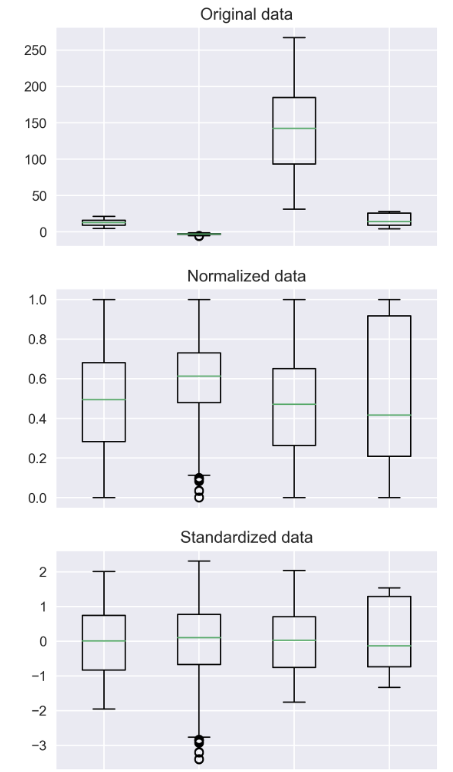

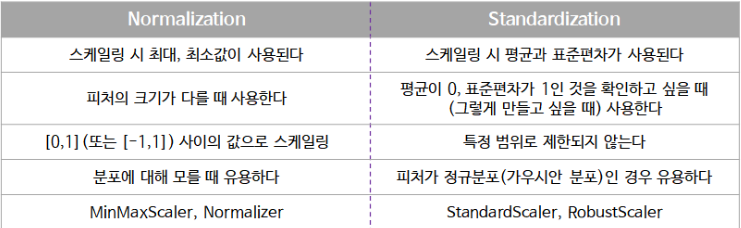

#### (1) *StandardScaler* 

In [ ]:
#표준화를 지원하는 클래스
#피처 각각이 평균이 0이고 분산이 1, 가우시안 정규 분포를 따르는 값들로 변환
#중요한 이유: svm, 선형회귀, 로지스틱 회귀는 가우시안 분포를 따른다고 가정하고 구현됨

from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
iris_df_scaled.head(3) #df형태로 변환해야 하는거 숙지!

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444


#### (2) *MinMaxScaler* 

In [ ]:
# 데이터의 값을 0과 1 사이 값으로 변환 (음수가 있으면 -1~1사이 값)
# 가우시안 분포가 아닐 때, 적용해볼 수  있음 

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [ ]:
iris_df_scaled.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


#### 학습 데이터와 테스트 데이터 스케일링 시 유의점

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0~10까지, 테스트 데이터는 0~5까지 값을 가지게 생성
# scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train 데이터:', np.round(train_array.reshape(-1),2))
print('스케일된 train 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
스케일된 train 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('원본 test 데이터:', np.round(test_array.reshape(-1),2))
print('스케일된 test 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test 데이터: [0 1 2 3 4 5]
스케일된 test 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


##### 트레인 데이터는 1/10로, 테스트 데이터는 1/5 비율로 줄었음 
##### 즉, 스케일링이 맞지 않음. 즉, train에서 원본값이 2가 test에서 원본값이 1인 값과 동일해지는 현상 발생
##### 결론. 학습 데이터를 기반으로 하기 때문에 테스트 값 역시 학습 데이터의 기준을 따라야 함. 테스트 데이터에서 fit()을 적용해 스케일링을 다시 하면 안된다는 말. fit()이 이미 적용된 scaler 객체를 이용해 transform()으로 변환

In [ ]:
# 제대로된 결과물
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
test_scaled = scaler.transform(test_array) #fit()다시 호출하지 않고 transform()만으로 변환

print('원본 train 데이터:', np.round(train_array.reshape(-1),2))
print('스케일된 train 데이터:', np.round(train_scaled.reshape(-1),2))

print('원본 test 데이터:', np.round(test_array.reshape(-1),2))
print('스케일된 test 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
스케일된 train 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test 데이터: [0 1 2 3 4 5]
스케일된 test 데이터: [0.  0.1 0.2 0.3 0.4 0.5]
